In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot the dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cern-electron-collision-data/dielectron.csv


### Loading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


Here we can see that 85 values from Target column is missing

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Run,100000.0,1.479353e+05,9.203061e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,100000.0,4.957212e+08,4.037703e+08,6414.000000,2.023970e+08,3.902759e+08,6.338891e+08,1.791247e+09
E1,100000.0,3.643647e+01,4.121620e+01,0.377928,8.458595e+00,2.171700e+01,5.000335e+01,8.506020e+02
px1,100000.0,1.358968e-01,1.340498e+01,-250.587000,-5.233675e+00,1.413385e-01,5.714560e+00,1.345390e+02
py1,100000.0,1.822913e-01,1.347028e+01,-126.079000,-5.276248e+00,9.909205e-02,5.648087e+00,1.474670e+02
pz1,100000.0,-1.508037e+00,5.160365e+01,-840.987000,-1.585983e+01,-3.129870e-01,1.321265e+01,7.600960e+02
pt1,100000.0,1.441217e+01,1.238874e+01,0.219629,3.771173e+00,1.296780e+01,2.001892e+01,2.655780e+02
eta1,100000.0,-6.409547e-02,1.462137e+00,-4.165380,-1.283883e+00,-6.117850e-02,1.144408e+00,2.622970e+00
phi1,100000.0,2.161430e-02,1.799562e+00,-3.141580,-1.527030e+00,3.432395e-02,1.562355e+00,3.141420e+00
Q1,100000.0,-5.480000e-03,9.999900e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


Looking at the minimum and maximum values of multiple column we are quite sure that this dataset needs to be scaled.

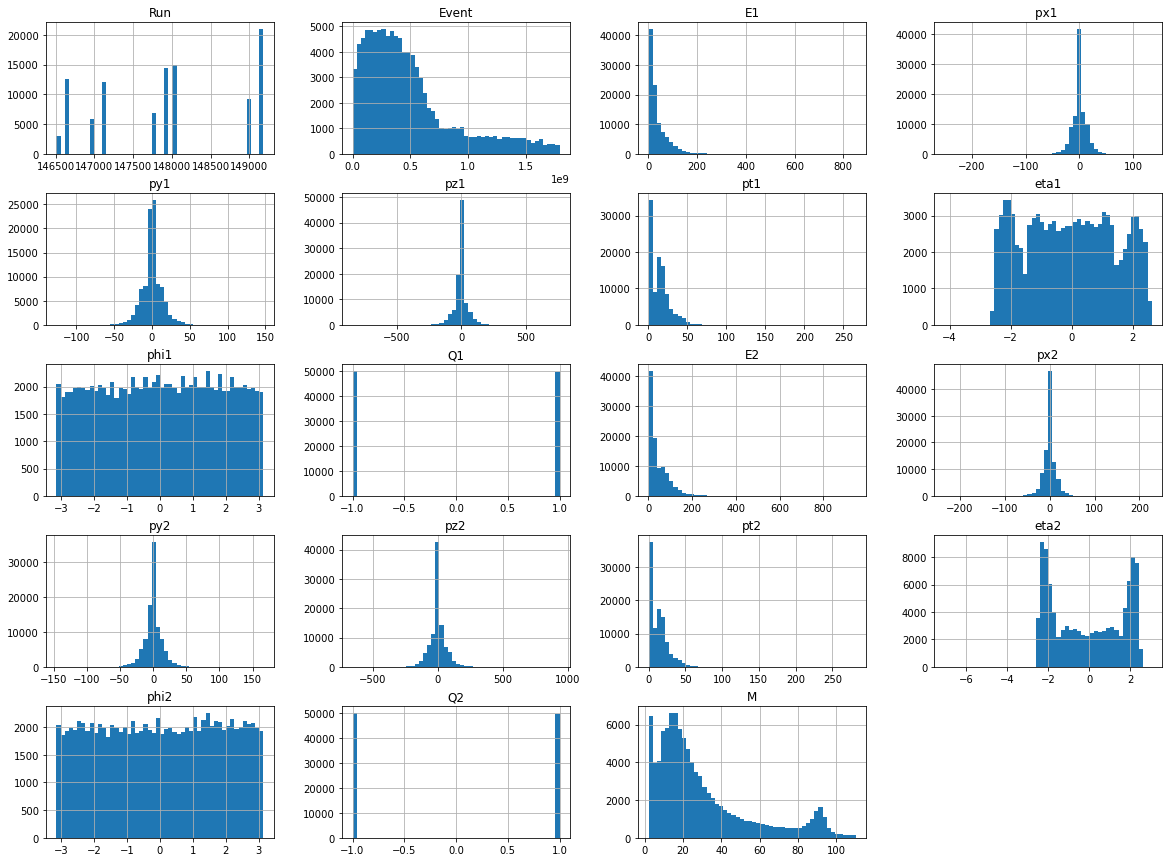

In [5]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

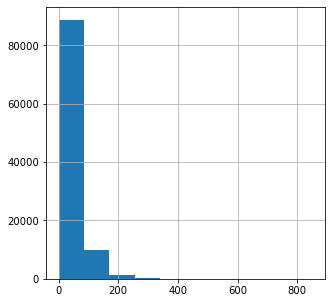

In [6]:
df['E1'].hist(bins = 10, figsize = (5,5))
plt.show()

In [7]:
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

As there are only 85 missing values, that too the target values, we opted to drop those rows

In [8]:
df2 = df.dropna(subset = ['M'])
df2.isnull().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99915 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99915 non-null  int64  
 1   Event   99915 non-null  int64  
 2   E1      99915 non-null  float64
 3   px1     99915 non-null  float64
 4   py1     99915 non-null  float64
 5   pz1     99915 non-null  float64
 6   pt1     99915 non-null  float64
 7   eta1    99915 non-null  float64
 8   phi1    99915 non-null  float64
 9   Q1      99915 non-null  int64  
 10  E2      99915 non-null  float64
 11  px2     99915 non-null  float64
 12  py2     99915 non-null  float64
 13  pz2     99915 non-null  float64
 14  pt2     99915 non-null  float64
 15  eta2    99915 non-null  float64
 16  phi2    99915 non-null  float64
 17  Q2      99915 non-null  int64  
 18  M       99915 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.2 MB


In [10]:
corr_matrix = df2.corr()
corr_matrix['M'].sort_values(ascending=False)

M        1.000000
pt2      0.437158
pt1      0.437140
E2       0.324660
E1       0.285231
Run      0.129452
Event    0.052364
eta2     0.018772
eta1     0.017102
pz2      0.015702
pz1      0.011526
py1      0.007538
px1      0.006112
Q1       0.005624
phi1     0.001833
Q2      -0.000444
phi2    -0.004145
px2     -0.004419
py2     -0.011725
Name: M, dtype: float64

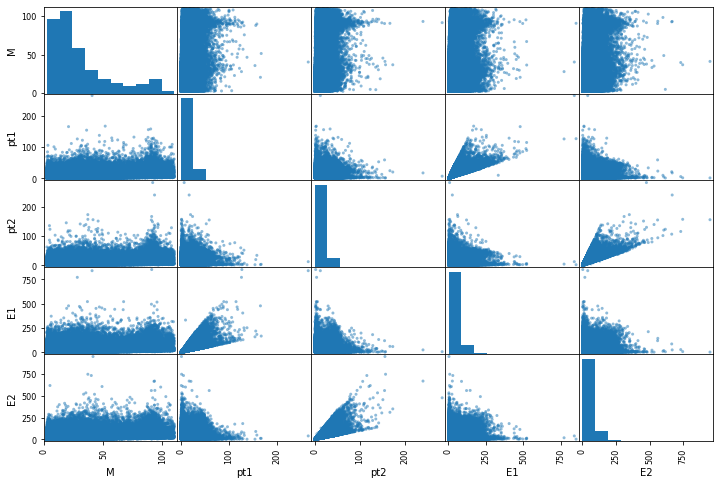

In [11]:
from pandas.plotting import scatter_matrix
attributes = ['M','pt1','pt2','E1','E2']
scatter_matrix(df2[attributes],figsize=(12,8))
plt.show()

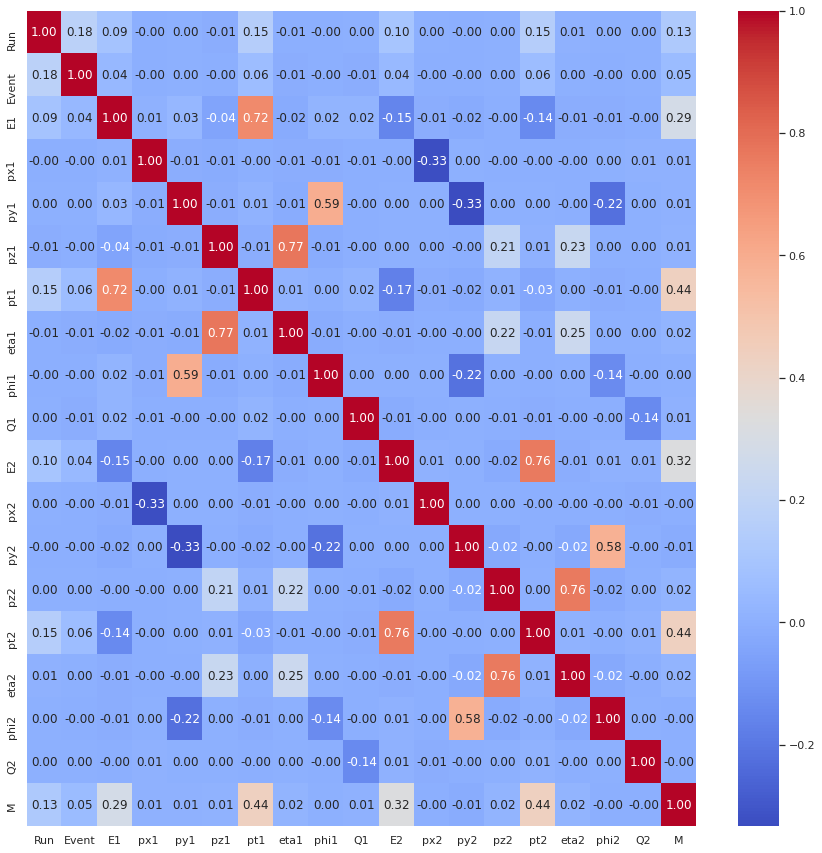

In [12]:
sns.set(rc={'figure.figsize':(15,15)})
g = sns.heatmap(df2.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Run and Event columns are there only to specify the run number and event number, so we find it safe just to drop those columns

In [13]:
df2.drop(labels = ["Run","Event"], axis = 1, inplace = True)
df2.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


## Train Test Split

Now we will do the split of Training Data and Testing Data with 80:20 ratio.

In [14]:
train_set,test_set = train_test_split(df2,test_size = 0.2, random_state = 42)

In [15]:
dataframe = train_set.drop('M',axis = 1)
dataframe_labels = train_set['M'].copy()

### Scaling
We can see the deviation among the min and max values of different columns, so what we thought of doing is Scaling and using StandardScaler 
StandardScaler first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. In other words, it centralizes the data.

In [16]:
scaler = StandardScaler()

In [17]:
dataframe_scaled = scaler.fit_transform(dataframe)

In [18]:
dataframe_scaled

array([[-0.75951741,  0.04883702, -0.32216361, ..., -0.45193208,
         0.69128598,  1.00534381],
       [-0.43561192, -0.50414618, -0.76047301, ...,  0.16417698,
        -0.53827285,  1.00534381],
       [-0.43140815,  0.4534928 ,  1.2855941 , ..., -1.10858679,
         1.47413314, -0.9946846 ],
       ...,
       [-0.78124917, -0.04032759, -0.29022078, ...,  0.81870945,
         1.22620797, -0.9946846 ],
       [-0.66282313, -0.0575785 ,  0.2438934 , ..., -0.98784357,
        -0.81355257,  1.00534381],
       [-0.45811173, -0.21880532,  0.29701465, ..., -1.00451664,
         1.01943487, -0.9946846 ]])

# **Models** 

First we tried rough implementation of different modeling techniques

### ***LINEAR REGRESSION***

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(dataframe_scaled, dataframe_labels)

LinearRegression()

In [20]:
dataframe_predictions = lin_reg.predict(dataframe_scaled)
lin_mse = mean_squared_error(dataframe_labels, dataframe_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

19.475013229356897

RMSE of Linear Regression is quite high

### ***DECISION TREE***

In [21]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(dataframe_scaled,dataframe_labels)

DecisionTreeRegressor()

In [22]:
dataframe_predictions = tree_reg.predict(dataframe_scaled)
tree_mse = mean_squared_error(dataframe_labels,dataframe_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### ***Random Forest***

In [23]:
forest_reg = RandomForestRegressor()
forest_reg.fit(dataframe_scaled,dataframe_labels)

RandomForestRegressor()

In [24]:
dataframe_predictions = forest_reg.predict(dataframe_scaled)
forest_mse = mean_squared_error(dataframe_labels,dataframe_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.1828547014356268

We can see that without any fine tuning Decision Tree is overfitting the data and Random Forest is near overfitting. Hence will do Cross Validation

In [25]:
def display_scores(scores):
    print('Scores',scores)
    print('Mean',scores.mean())
    print('Standard Deviation',scores.std())

### Using Cross Validation

In [26]:
lin_scores = cross_val_score(lin_reg,dataframe_scaled,dataframe_labels,
                             scoring = 'neg_mean_squared_error',cv =10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [19.68835651 19.38900082 19.17356977 19.84608752 19.57810137 19.18604122
 19.64945899 19.30526745 19.36929669 19.63382691]
Mean 19.48190072430533
Standard Deviation 0.21697421780083911


> Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.

In [27]:
scores = cross_val_score(tree_reg,dataframe_scaled,dataframe_labels,
                         scoring='neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [28]:
display_scores(tree_rmse_scores)

Scores [10.2888147  10.32280297 10.26404145 10.24368621 10.53705382  9.65371635
 11.18638669 10.38485728 10.31608469 10.19069802]
Mean 10.338814216739106
Standard Deviation 0.35623148968941853


In [29]:
forest_scores = cross_val_score(forest_reg,dataframe_scaled,dataframe_labels,
                                scoring = 'neg_mean_squared_error',cv =10)

In [30]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [5.87588627 5.96047598 5.58595075 5.7860323  5.73231149 5.5088636
 5.86308001 5.67867455 5.61496231 6.02111366]
Mean 5.762735091810265
Standard Deviation 0.1596270649088283


Of the three we can see that Random Forest has lowest RMSE and is also quite stable, so will use GridSearchCV for hyperparameter tuning

### GridSearchCV

In [31]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv=5,scoring = 'neg_mean_squared_error')
grid_search.fit(dataframe_scaled,dataframe_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [32]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [33]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [34]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

8.057419167882582 {'max_features': 2, 'n_estimators': 3}
6.11422121699499 {'max_features': 2, 'n_estimators': 10}
5.3415648823192505 {'max_features': 2, 'n_estimators': 30}
7.842692421494385 {'max_features': 4, 'n_estimators': 3}
5.088749507723305 {'max_features': 4, 'n_estimators': 10}
4.728506565374758 {'max_features': 4, 'n_estimators': 30}
6.834723633663124 {'max_features': 6, 'n_estimators': 3}
5.572837411242605 {'max_features': 6, 'n_estimators': 10}
4.8590444692385475 {'max_features': 6, 'n_estimators': 30}
7.024485233067631 {'max_features': 8, 'n_estimators': 3}
5.55191280882141 {'max_features': 8, 'n_estimators': 10}
4.990795518011166 {'max_features': 8, 'n_estimators': 30}
7.30942977791627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.559880971253442 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.753799957192363 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.1069376018095864 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [35]:
feature_importances =  grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09839686, 0.02414687, 0.02932899, 0.12030658, 0.11469887,
       0.09049641, 0.01009194, 0.00077466, 0.08310161, 0.01843301,
       0.03276356, 0.10821432, 0.17379917, 0.08688955, 0.00781126,
       0.00074635])

In [36]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("M", axis=1)
y_test = test_set["M"].copy()
X_test_prepared = scaler.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [37]:
print(final_rmse)

4.477313932933207
